In [1]:
# Пожалуйста, закомментируйте эту ячейку перед отправкой
# %pip install -q -r requirements-ml.txt

In [2]:
# Пожалуйста, не изменяйте эту ячейку! Перед отправкой её комментировать не надо!
%pip install scikit-learn==0.22.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


<h1><center><font size="6"><b>Проектная работа</b></font></center></h1>
<h1><center><font size="6"><b>Анализ оттока клиентов в сети фитнес-клубов</b></font></center></h1>

<h1><center><font size="5"><b>Цель: провести анализ и подготовить план действий по удержанию клиентов </b></font></center></h1> 

<h1><center><font size="4"><b>Описание проекта</b></font></center></h1>

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.  
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.  
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.  
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.  
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.  
А именно:  
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;  
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;  
проанализировать основные признаки, наиболее сильно влияющие на отток;  
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:  
    1) выделить целевые группы клиентов;  
    2) предложить меры по снижению оттока;  
    3) определить другие особенности взаимодействия с клиентами.  

__Набор данных включает следующие поля:__  
`Churn` — факт оттока в текущем месяце;  
__Текущие поля в датасете:__  
__Данные клиента за предыдущий до проверки факта оттока месяц:__  
`gender` — пол;  
`Near_Location` — проживание или работа в районе, где находится фитнес-центр;  
`Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
`Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
`Phone` — наличие контактного телефона;  
`Age` — возраст;  
`Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах).  
__Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:__  
`Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
`Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);  
`Group_visits` — факт посещения групповых занятий;  
`Avg_class_frequency_total` — средняя частота посещений в неделю за все время с начала действия абонемента;  
`Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;  
`Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.  

## 1. Загрузка данных

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('/datasets/gym_churn.csv') #для проекта в яндекс.практикум
#data = pd.read_csv('gym_churn.csv') #для проекта в DataSphere

In [5]:
data.sample(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
2103,0,1,1,1,0,12,0,31,378.618793,10.0,5,3.093998,3.168640,0
3470,1,1,0,0,1,1,1,29,168.219241,1.0,12,1.877924,1.649566,0
3388,0,1,0,1,1,6,1,35,93.141514,6.0,2,1.700830,1.701676,0
2511,1,1,0,1,1,1,1,26,210.458748,1.0,5,2.421836,2.336440,0
1489,0,1,0,0,1,12,0,31,324.092238,9.0,4,2.630016,2.644154,0
3686,1,1,0,0,1,1,0,23,326.291209,1.0,6,0.065075,0.143853,0
1223,1,1,0,0,1,1,0,31,62.083149,1.0,7,2.275700,2.498707,0
221,1,1,0,0,1,1,1,27,33.348957,1.0,0,1.833055,0.006398,1
1944,0,1,1,1,1,6,1,33,11.993488,6.0,1,4.210084,4.293216,0
2475,0,1,1,1,1,12,1,35,145.195236,11.0,3,2.772172,2.919413,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [7]:
#приведём названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
#проверим на дубликаты
print('Количествово дубликатов: {}\n'.format(data.duplicated().sum()))

Количествово дубликатов: 0



__Аномалий и дубликатов в данных не обнаружено, изменен регистр в названии столбцов на нижний для удобства работы. Данные готовы для анализа.__

## 2. Исследовательский анализ данных (EDA)

__Посмотрим на распределение__

In [8]:
data.describe().T #развернем таблицу для удобства, в целом не критично, но на маленьком экране удобнее

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


__Результат анализа:__  
- Распределение по полу почти равномерное, серьезного перекоса нет.  
- 85% клиентов находятся ряжом, живут или работают.
- 50% клиентов - сотрудники компании-партнёра клуба.  
- 30% клиентов пришли в рамках акции «приведи друга».  
- 90% клиентов оставили свои контактные телефоны.  
- Средняя длительность абонемента 4.6 мес.  
- 41% клиентов посещает групповые занятия.  
- 29 лет - средний возраст клиентов.  
- 146 ед. - средняя дополнительная выручка от других услуг фитнес-центра.  
- 3.7 мес. - среднее время с момента первого обращения в фитнес-центр.  
- 1.87 раз в неделю - средняя частота посещений за все время.  
- 1.76 раз в неделю - средняя частота посещений за последний месяц.  
- отток 27%.  

__Посмотрим средние значения для факта оттока клиента.__

In [9]:
data_churn_0=data.query('churn==0')
data_churn_1=data.query('churn==1')
data_grouped=data.groupby('churn').mean()
data_grouped.T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


У ушедших клиентов метрики меньше. Время до окончания контракта и "время жизни" отличается в несколько раз.   
Построим графики распределения.

In [10]:
X=data.drop(columns='churn')
y=data['churn']
binq=[2,2,2,2,2,12,2,None,None,12,10,None,None]
i=0

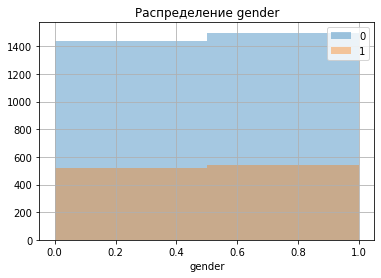

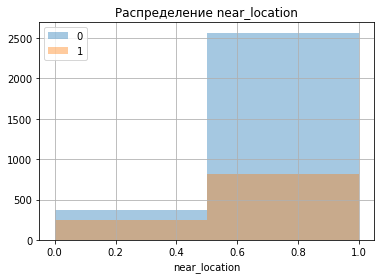

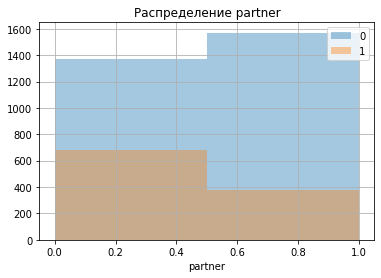

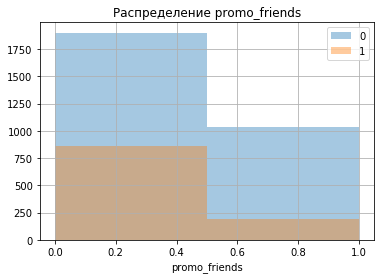

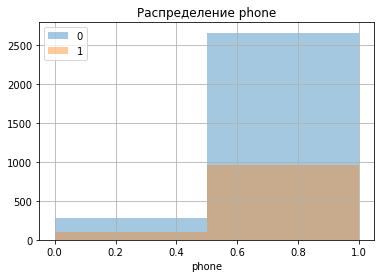

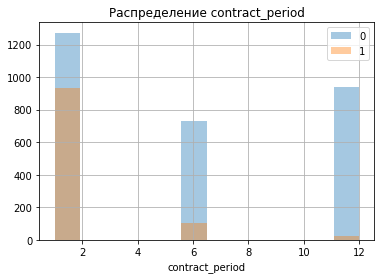

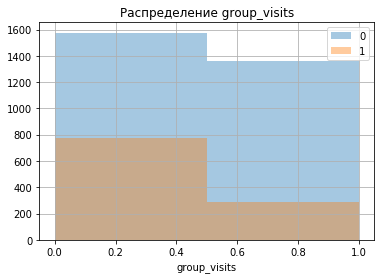

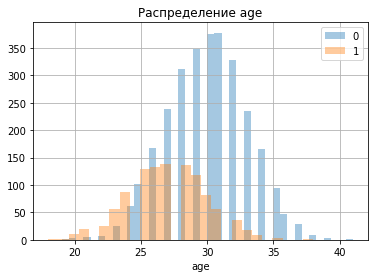

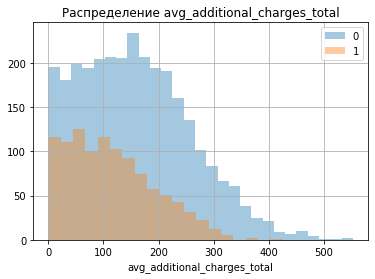

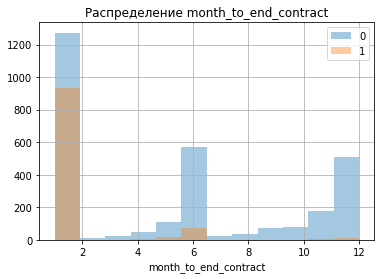

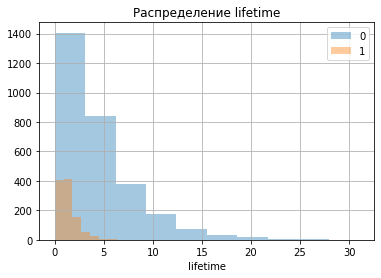

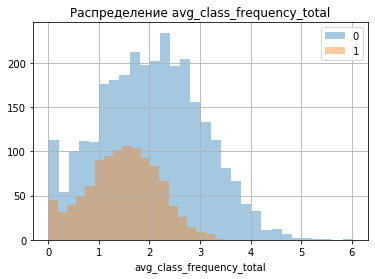

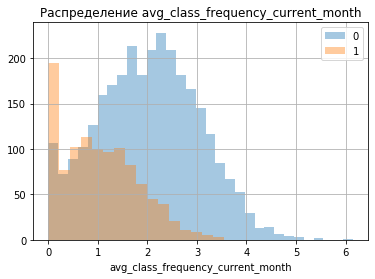

In [11]:
X=data.drop(columns='churn')
y=data['churn']
binq=[2,2,2,2,2,12,2,None,None,12,10,None,None]
i=0
for name in X.columns:
    sns.distplot(data_churn_0[name],bins=binq[i],kde=False,label='0')
    sns.distplot(data_churn_1[name],bins=binq[i],kde=False,label='1')
    i+=1
    plt.grid()
    plt.title('Распределение '+name)
    plt.legend()
    plt.show()

Большинство клинетов имели контракт на 1 месяц.  
Клиентов, которые берут контракт на несколько месяцев, а потом уходят весьма не много. 
Чаще всего уходят клиенты с малым сроком контракта и низким "временем жизни".  
Клиенты, которые посещали фитнес-клуб более 5 месяцев чаще остаются и дальше.

__Сформироуем матрицу корреляций__

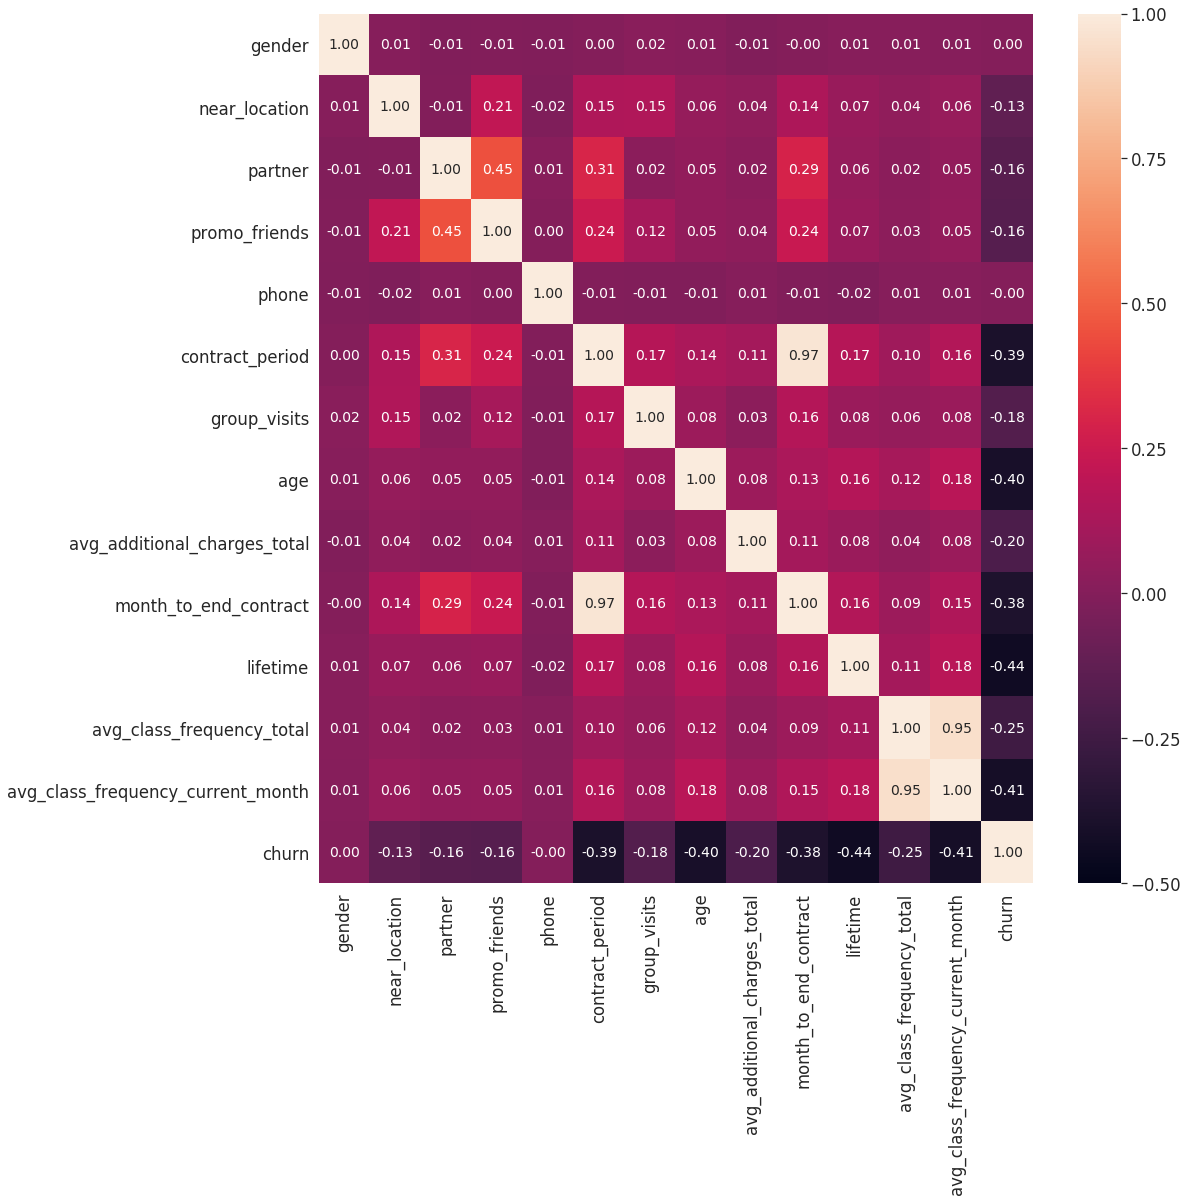

In [12]:
cm=data.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16,16))
sns.heatmap(cm,annot=True,fmt='.2f',vmin=-0.5,annot_kws={"size": 14});

Из признаков высокую кореляцию показывают длителньость контракта, время до конца контракта и частота посещений. Вполне очевидная связь. По сути длительности контактов показывают одно и то же.

__Вывод:__  
Можно предположить, что у пользователей не хватает заинтересованности, т.к. много пользователей уходят после первого месяца. Очень мало пользователей берут длинные контракты, а потом пропадают. Если пользователей посещает фитнес-клуб 6 месяцев, то скорее всего будет посещать его и дальше.

## 3. Постройка модели прогнозирования оттока пользователей

Обучим две модели предсказания и выделим из них лучшую.  
Будем использовать:  

- Логическую регрессию  
- Случайный лес  

Выделим обучающую выборку и валидационную и стандартизируем их  

In [13]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

Функция обучения и подсчета метрик модели.

In [14]:
def train_model(m):
    print(m)
    model=m
    model.fit(X_train_sc,y_train)
    y_pred=model.predict(X_test_sc)
    print('Accuracy',accuracy_score(y_test,y_pred), 
         '\nRecall',recall_score(y_test,y_pred),
         '\nPrecision',precision_score(y_test,y_pred),'\n')

for mod in [LogisticRegression(), RandomForestClassifier()]:
    train_model(mod)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 0.92875 
Recall 0.8571428571428571 
Precision 0.8773584905660378 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.9275 
Recall 0.847926267281106 
Precisio

__По метрикам логическая регрессия оказалась лучше на валидационной выборке, для предсказания оттока будем использовать ее.__

## 4. Кластеризация пользователей

### 4.1. Стандартизируйте данные. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.

Проведем кластеризацию пользователей по признакам, стнандартизируем их и построим дендограмму.

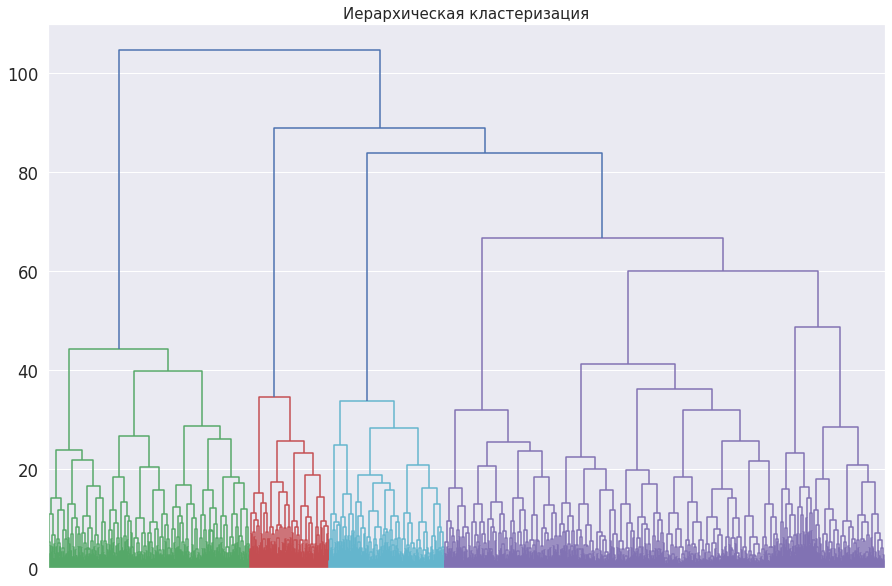

In [15]:
scaler=StandardScaler()
X_sc=scaler.fit_transform(data.drop(columns='churn'))
linked=linkage(X_sc,method='ward')
plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top',no_labels=True)
plt.title('Иерархическая кластеризация', fontsize=15)
plt.show()

Метод кластеризации выделил 4 кластера.   
Испольузем метод k-средних для выделения 5 кластеров.

### 4.2. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.

In [16]:
n=5
km = KMeans(n_clusters = n, init='k-means++', random_state = 0) 
labels = km.fit_predict(X_sc) 
data['clusters']=labels
data.groupby('clusters').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
clusters,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480300,0.812383,0.000000,0.086304,1.000000,1.863039,0.324578,28.136961,131.299377,1.787992,2.346154,1.325794,1.086387,0.550657
2,0.560096,0.858173,0.337740,0.197115,0.998798,2.734375,0.449519,30.204327,164.628354,2.522837,5.007212,2.926304,2.932554,0.048077
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


### 4.3. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

У кластера с самым большим оттоком наименьшая длительность контракта, да и все остальные признаки заметно меньше. Кластеры с большой долей оттока реже остальных ходят в зал и среднее время жизни заметно меньше. Выделяется класер с нулевой близостью. Таким пользователям не хватает мотивации ездить далеко в фитнес-клуб, и они уходят.

In [17]:
sns.set(font_scale=1)
clusters=[]
for number in data['clusters'].unique():
    clusters.append([data.query('clusters==@number'),number])

### 4.4. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

__Рассмотрим распределение признаков для каждого кластера__

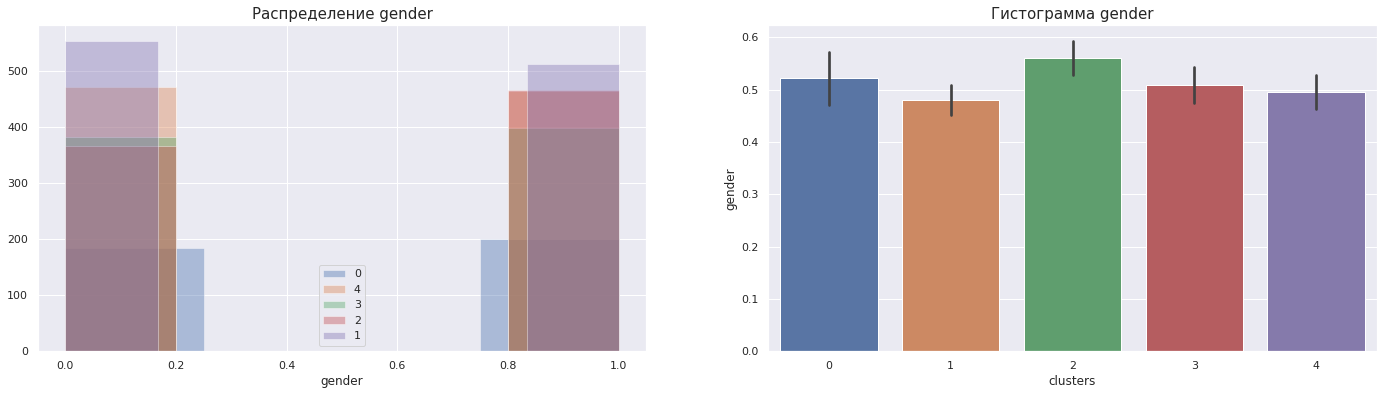

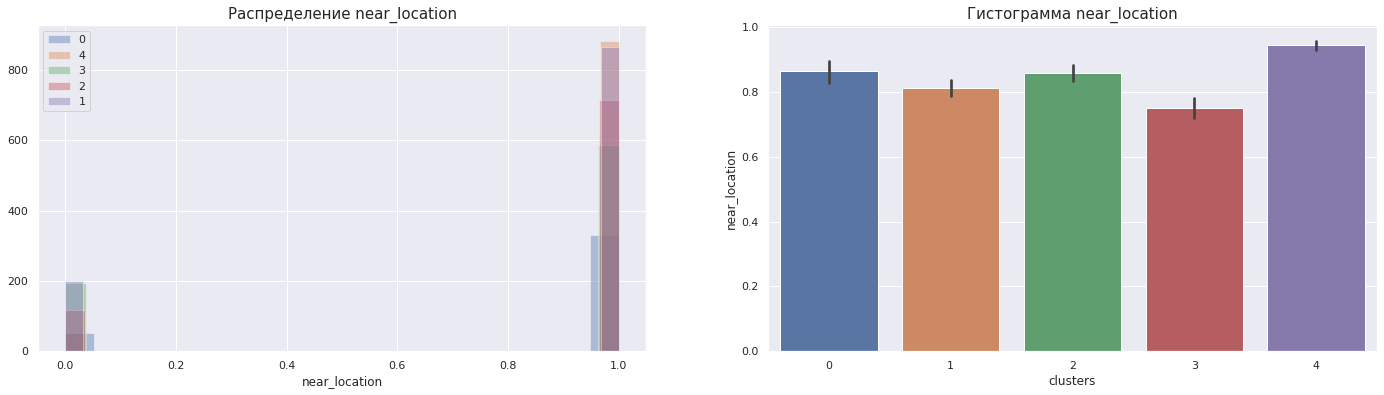

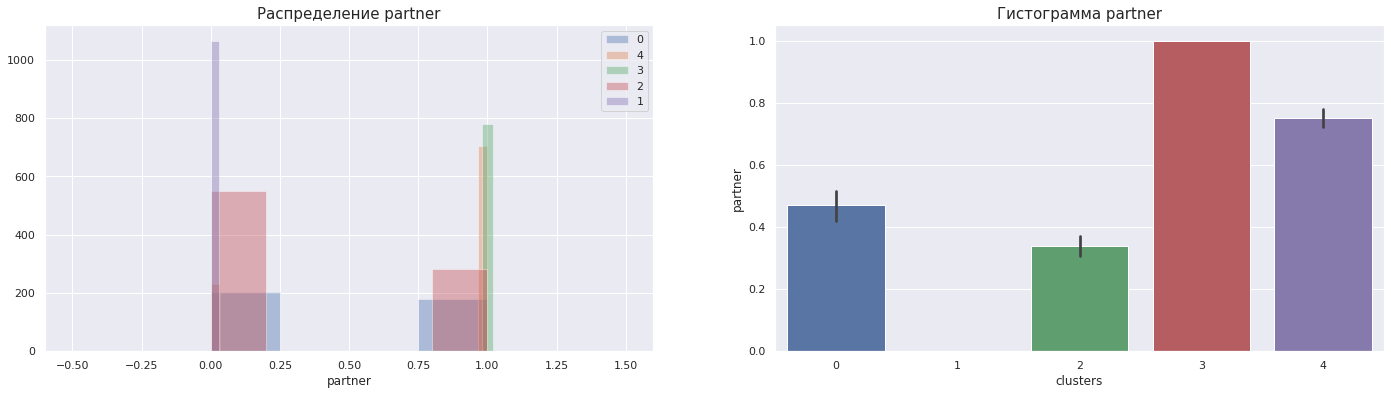

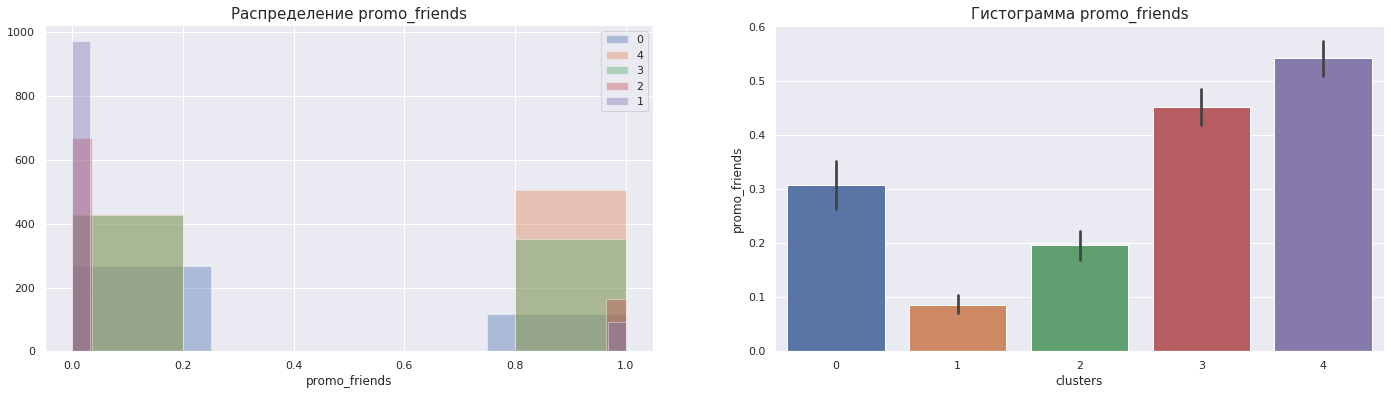

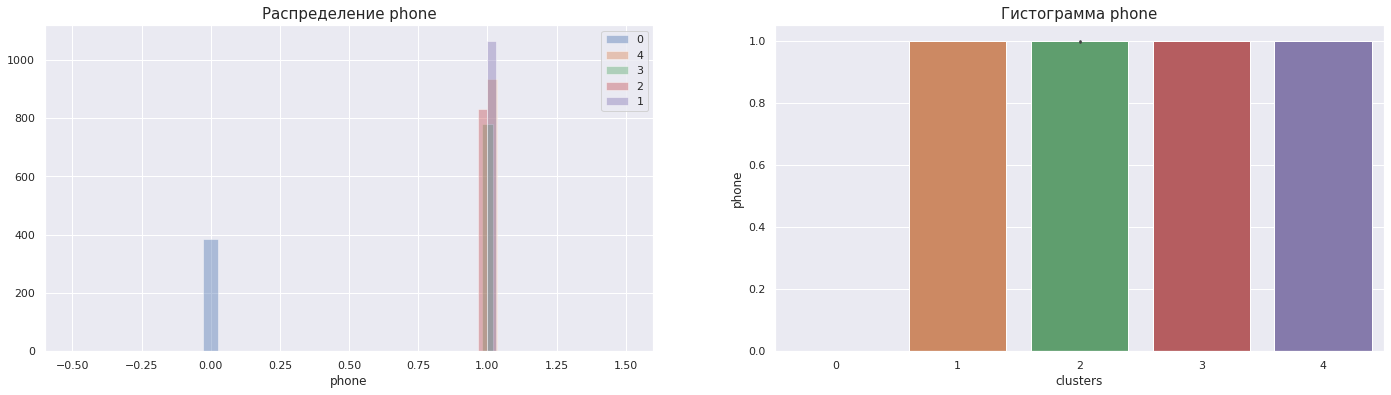

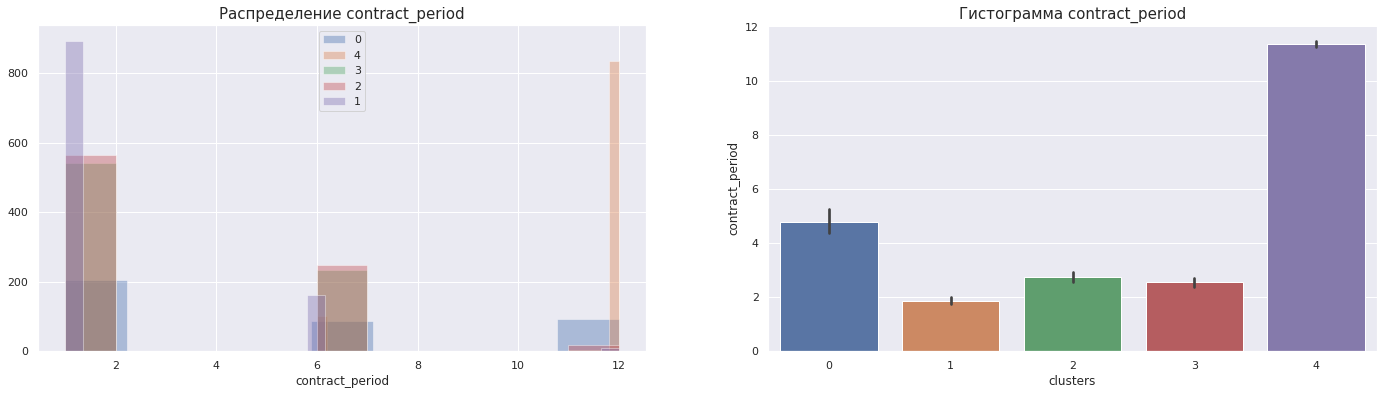

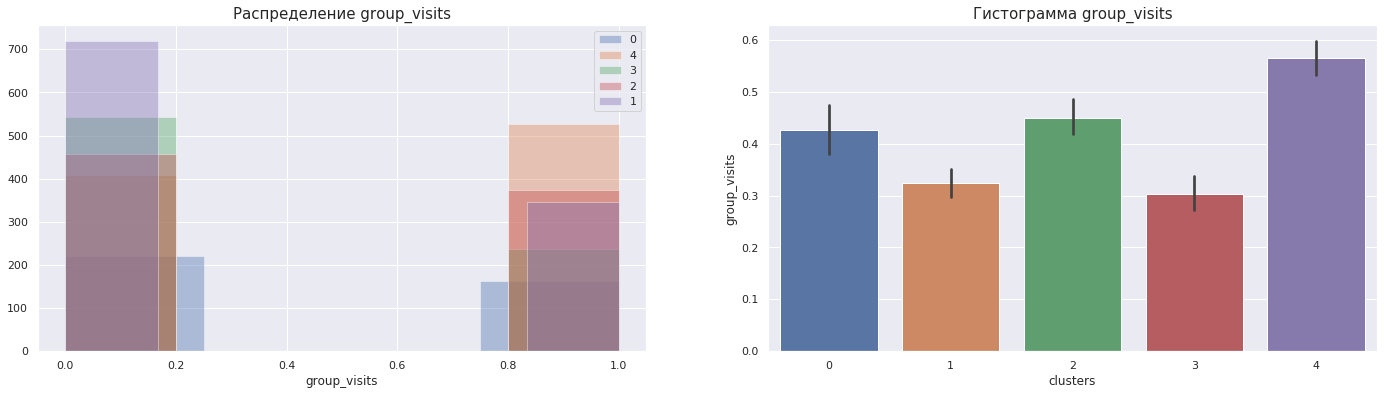

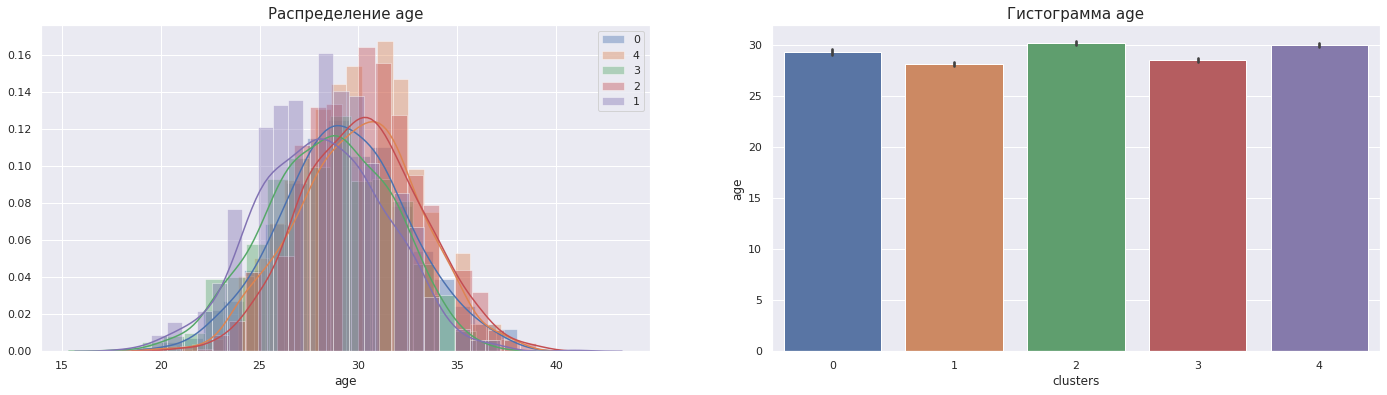

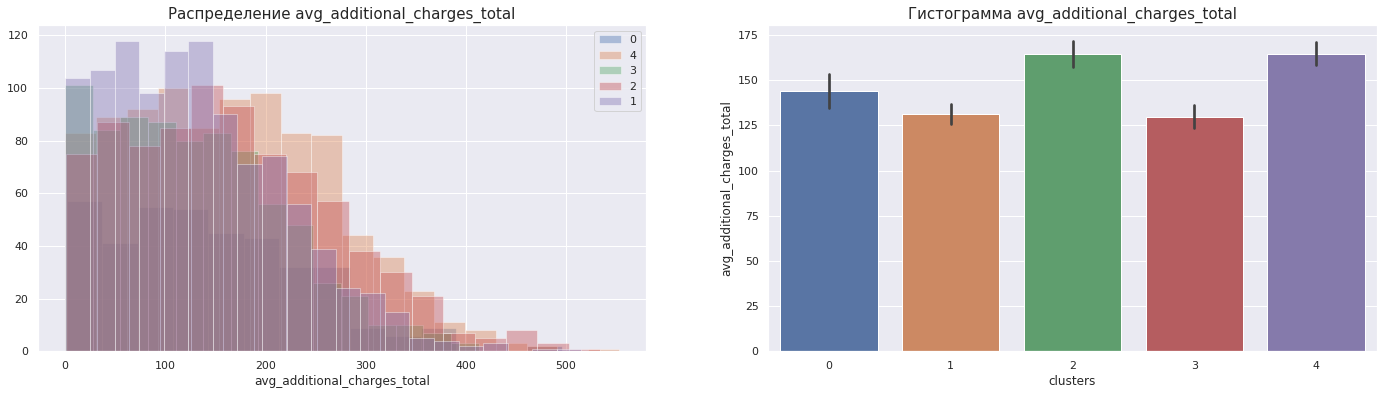

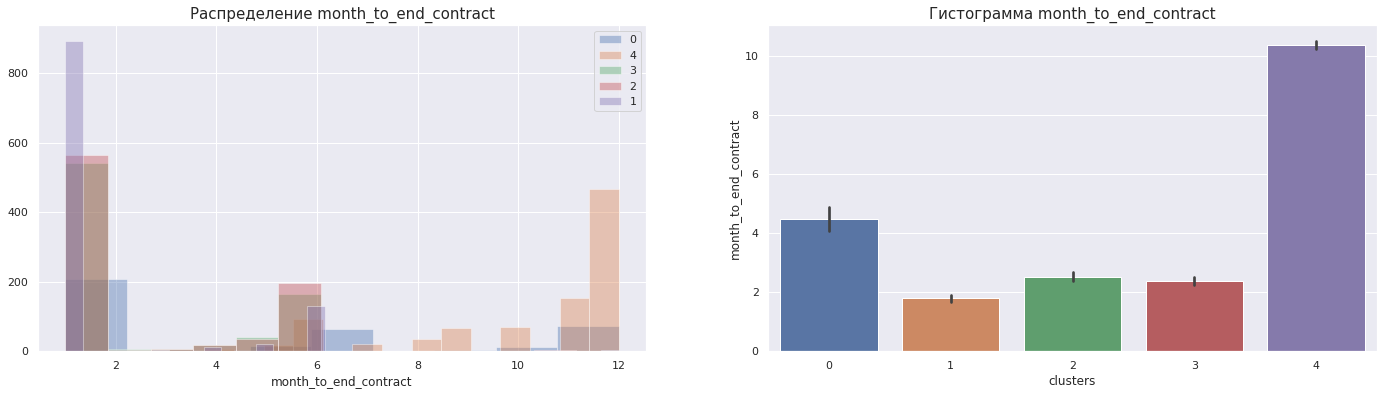

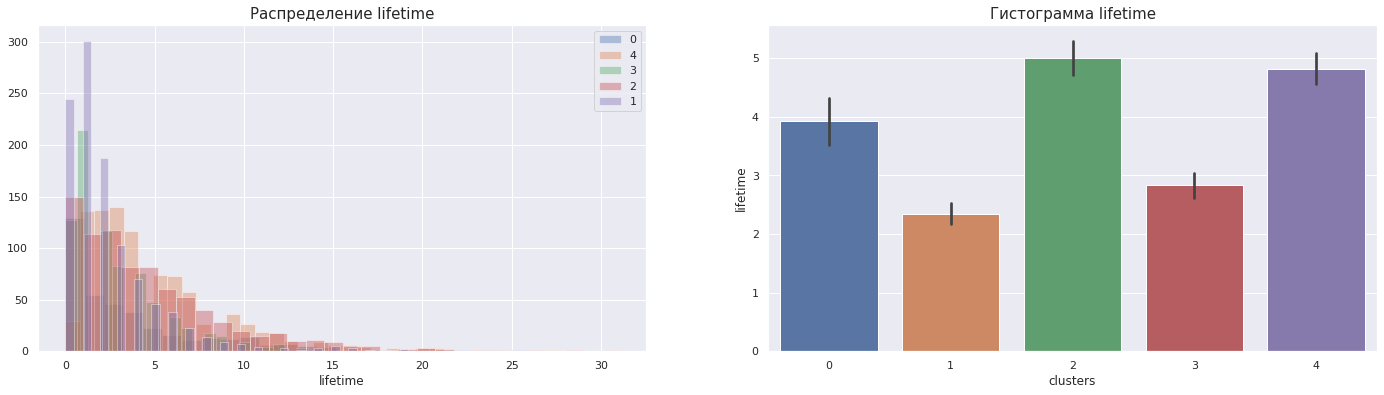

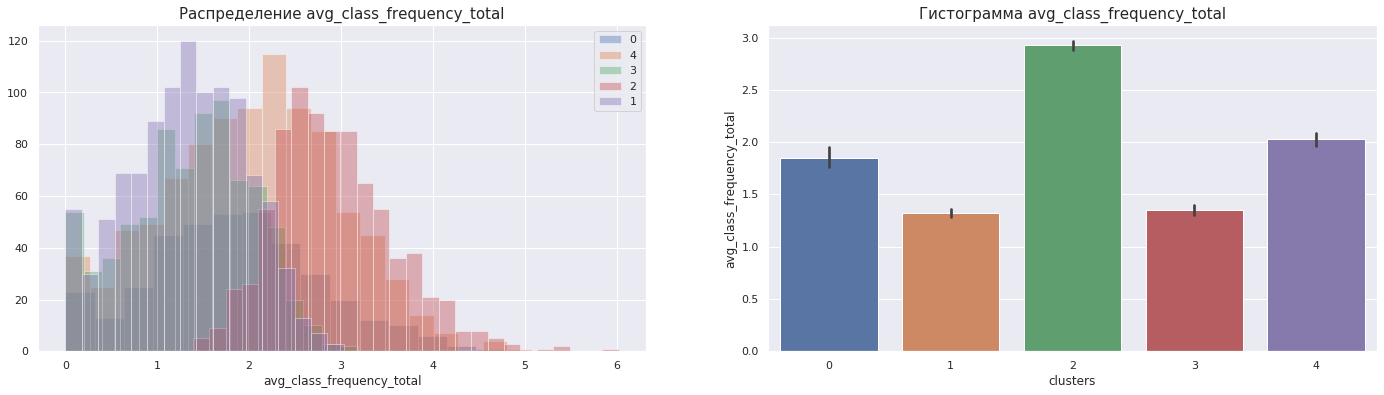

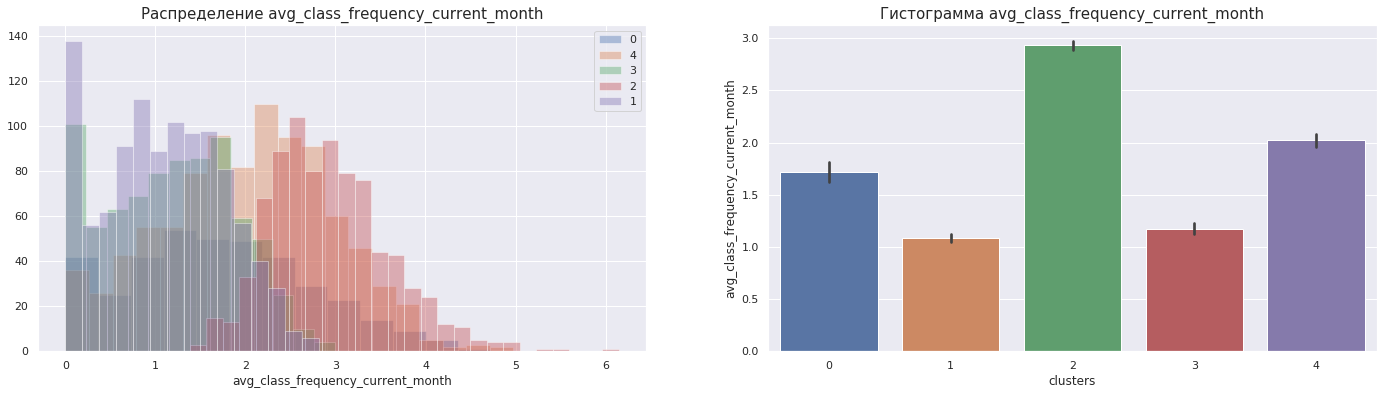

In [18]:
for name in X.columns:
    fig, ax = plt.subplots(1, 2, figsize=(24,6))
    for element in clusters:
        if name=='age':
            sns.distplot(element[0][name],kde=True,label=element[1],ax=ax[0])
        else:
            sns.distplot(element[0][name],kde=False,label=element[1],ax=ax[0])
    ax[0].legend()
    ax[0].set_title('Распределение '+name,fontsize=15)
    sns.barplot(data=data,x='clusters',y=name,ax=ax[1])
    ax[1].set_title('Гистограмма '+name,fontsize=15)

    plt.show()

На графиках посещения фитнес-центра видно, что кластеры с большим оттоком посещают зал реже.     
У многих из этих кластеров заканчивается контракт.   
Некоторые перестают ездить из-за расстояния.   
Остальные графики только подтвержают выводы из таблицы средних.

### 4.5. Для каждого полученного кластера посчитайте долю оттока.

In [19]:
data.groupby('clusters').agg({'churn':'mean'})

,churn
clusters,
0,0.267532
1,0.550657
2,0.048077
3,0.395647
4,0.023504


__Вывод:__
Многие ушедшие пользователи не перестают ходить разом, но их посещение заметно уменьшается.  
Клиенты, которым далеко добираться все равно уйдут.  
Многие пользователи покупают абонемент на месяц и потом уходят.
Незаинтересованные пользователи менее активны, хотя тратят примерно столько же.  
С помощью кластеризации у нас получилось выделить 5 кластеров.  
Среди них есть кластеры с большой вероятностью оттока, но и почти с нулевой вероятностью оттока.

## 5. Выводы.

В исследовательском анализе мы увидели, что средние показатели лояльных и ушедших пользователей достаточно сильно отличаются (ушедшие менее активны).   Заметили, что у многих ушедших контракт был всего на 1 месяц, и они не стали его продлевать.Очень мало пользователей берут долгий контракт и пропадают. После 5-6 месяцев лояльности посетители с большой долей вероятности не перестанут ходить.   
Средний возраст ушедних немного меньше с.в лояльных.  
Мы обучили две модели 1) логическая регрессия 2) случайный лес. Логическая регрессия оказалась на валидационной выборке лучше по всем метрикам, поэтому я рекомендую ее для использования.
В работе приведена кластеризация посетителей на 5 кластеров. При их анализе мы увидели, что некоторые пользователи перестают ходить в силу удаленности фитнес-центра, у некоторых просто нехватает мотивации продлевать контракт.  

Возможно, получится уменьшить отток пользователей тем, что убрать месячные контракты. Да, покупателей станет меньше, однако после 5-6 месяц времени жизни пользователи становятся лояльными и уже вряд ли уйдут. Тем самым можно будет сильно уменьшить долю оттока. Можно попробовать изменения, повышающие интерес посетителей, однако это будет не так действенно.  

Рекомендации:  
- рассмотреть возможность предлагать абонементы на длительный срок, более полугода.  
- сделать больше акцента на групповые занятия.  
- расширить партнерскую сеть, по которой поступает значительное количество клиентов.  
- рассмотреть возможность расширения спектра дополинтельных услуг. 
- стимулировать проведение акции "приведи друга".  